In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# required libs
from bs4 import BeautifulSoup
import requests  
import pandas as pd
import numpy as np
import glob
import csv 

# Data parsing

In [ ]:
# function write urls of cars from first 50 pages by years
def make_car_links(year):
    car_links = []
    url = f'https://auto.ru/cars/{year}-year/used/?page='
    f = open(f'/content/drive/MyDrive/Project/car_links_{year}.txt', 'w')
    for i in range(1,50):  # pages 
        url_i = url + str(i)
        response = requests.get(url_i)
        response.encoding ='utf8'
        page = BeautifulSoup(response.text, 'html.parser')
        links = page.find_all('a', class_='Link ListingItemTitle-module__link')
        for link in links:
            f.write(link.get("href")+'\n')
    f.close()
    

for i in range(2016,2021):
    make_car_links(i)

In [ ]:
# function return car data from given url
def car_info(url):
    response = requests.get(url)    
    response.encoding ='utf8' 
    page = BeautifulSoup(response.text, 'html.parser')
    brand = url.split('/')[6]
    model = url.split('/')[7]
    year = page.find('li', class_= 'CardInfoRow CardInfoRow_year').find('a','Link Link_color_black').text
    mileage =  page.find('li', class_= 'CardInfoRow CardInfoRow_kmAge').find_all('span','CardInfoRow__cell')[1].text.replace(u'\xa0', u'')
    body_type = page.find('li', class_= 'CardInfoRow CardInfoRow_bodytype').find('a','Link Link_color_black').text
    color = page.find('li', class_= 'CardInfoRow CardInfoRow_color').find_all('span','CardInfoRow__cell')[1].text
    engine_volume = page.find('li', class_= 'CardInfoRow CardInfoRow_engine').find('div').text.replace(u'\xa0', u'').split('/')[0].strip()
    horsepower = page.find('li', class_= 'CardInfoRow CardInfoRow_engine').find('div').text.replace(u'\xa0', u'').split('/')[1].strip()
    flue_type = page.find('li', class_= 'CardInfoRow CardInfoRow_engine').find('div').text.replace(u'\xa0', u'').split('/')[2].strip()
    tax =  page.find('li', class_= 'CardInfoRow CardInfoRow_transportTax').find_all('span','CardInfoRow__cell')[1].text.replace(u'\xa0', u'')
    transmission =  page.find('li', class_= 'CardInfoRow CardInfoRow_transmission').find_all('span','CardInfoRow__cell')[1].text
    drive = page.find('li', class_= 'CardInfoRow CardInfoRow_drive').find_all('span','CardInfoRow__cell')[1].text
    whell = page.find('li', class_= 'CardInfoRow CardInfoRow_wheel').find_all('span','CardInfoRow__cell')[1].text
    state = page.find('li', class_= 'CardInfoRow CardInfoRow_state').find_all('span','CardInfoRow__cell')[1].text
    owners = page.find('li', class_= 'CardInfoRow CardInfoRow_ownersCount').find_all('span','CardInfoRow__cell')[1].text[0]
    pts = page.find('li', class_= 'CardInfoRow CardInfoRow_pts').find_all('span','CardInfoRow__cell')[1].text
    customs = page.find('li', class_= 'CardInfoRow CardInfoRow_customs').find_all('span','CardInfoRow__cell')[1].text
    price = page.find('span', class_='OfferPriceCaption__price').text.replace(u'\xa0', u'')
    return url, brand, model, year, mileage, body_type, color, engine_volume, horsepower, flue_type, tax, transmission, drive, whell, state, owners, pts, customs, price


# for each url from txt file used car_info function
# in result if car is actualy not saled then will stored in file 
# else url will be printed
read_files = glob.glob("/content/drive/MyDrive/Project/*.txt")
for file in read_files:
    f = open(file)
    out_f = open(f'car_info_{file[-8:-4]}.csv', 'w')
    with out_f:
        writer = csv.writer(out_f)
        for line in f:
            try:
                writer.writerow(car_info(line[:-1]))
            except:
                print(line)

https://auto.ru/cars/used/sale/porsche/boxster/1103246041-3d2c50dd/

https://auto.ru/cars/used/sale/uaz/pickup/1102837872-3fcdb61e/

https://auto.ru/cars/used/sale/bmw/x6/1101942782-59f30616/

https://auto.ru/cars/used/sale/lexus/rx/1103334648-c1a2a51e/

https://auto.ru/cars/used/sale/audi/q7/1101944934-9d47e94c/

https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1101810234-7c78120a/

https://auto.ru/cars/used/sale/lexus/nx/1103354558-c60c7fcc/

https://auto.ru/cars/used/sale/mercedes/c_klasse/1101970764-5b8f4619/

https://auto.ru/cars/used/sale/hyundai/h_1_starex/1103343641-5b5da33d/

https://auto.ru/cars/used/sale/toyota/rav_4/1103312465-ac4d088f/

https://auto.ru/cars/used/sale/uaz/pickup/1103355693-962ef8cc/

https://auto.ru/cars/used/sale/kia/sportage/1103337517-b67ef59b/

https://auto.ru/cars/used/sale/nissan/x_trail/1103286116-8827cd00/

https://auto.ru/cars/used/sale/mazda/6/1103281039-03c0c426/

https://auto.ru/cars/used/sale/ford/mondeo/1101952178-64de7d93/

https://au

In [ ]:
# concat all files into 
read_csv = glob.glob("/content/drive/MyDrive/Project/*.csv")
df = pd.DataFrame()
for csv in read_csv:
    df1 = pd.read_csv(csv, header=None)
    df = pd.concat([df,df1])
df.columns =['url', 'brand', 'model', 'year', 'mileage', 'body_type', 'color', 'engine_volume', 'horsepower', 'flue_type', 'tax', 'transmission', 'drive', 'whell', 'state', 'owners', 'pts', 'customs', 'price']

In [ ]:
df

,url,brand,model,year,mileage,body_type,color,engine_volume,horsepower,flue_type,tax,transmission,drive,whell,state,owners,pts,customs,price
0,https://auto.ru/cars/used/sale/kia/sorento/110...,kia,sorento,2018,34000км,внедорожник 5 дв.,синий,2.2 л,200л.с.,Дизель,10000₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2360000₽
1,https://auto.ru/cars/used/sale/hyundai/creta/1...,hyundai,creta,2018,69000км,внедорожник 5 дв.,чёрный,2.0 л,149л.с.,Бензин,1043₽ / год,автоматическая,передний,Левый,Не требует ремонта,1,Оригинал,Растаможен,1249000₽
2,https://auto.ru/cars/used/sale/infiniti/qx80/1...,infiniti,qx80,2018,59400км,внедорожник 5 дв.,синий,5.6 л,405л.с.,Бензин,60750₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,4800000₽
3,https://auto.ru/cars/used/sale/chevrolet/trave...,chevrolet,traverse,2018,7696км,внедорожник 5 дв.,чёрный,3.6 л,318л.с.,Бензин,47700₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,3290000₽
4,https://auto.ru/cars/used/sale/volkswagen/tera...,volkswagen,teramont,2018,40380км,внедорожник 5 дв.,чёрный,2.0 л,220л.с.,Бензин,14300₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,3650000₽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,https://auto.ru/cars/used/sale/volkswagen/pass...,volkswagen,passat,2016,21713км,универсал 5 дв.,белый,1.8 л,180л.с.,Бензин,9000₽ / год,роботизированная,передний,Левый,Не требует ремонта,2,Оригинал,Растаможен,1729000₽
1786,https://auto.ru/cars/used/sale/audi/q7/1102983...,audi,q7,2016,133248км,внедорожник 5 дв.,синий,3.0 л,249л.с.,Дизель,18675₽ / год,автоматическая,полный,Левый,Не требует ремонта,2,Оригинал,Растаможен,2939000₽
1787,https://auto.ru/cars/used/sale/mercedes/glc_co...,mercedes,glc_coupe,2016,49506км,внедорожник 5 дв.,белый,2.0 л,211л.с.,Бензин,13715₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,3091875₽
1788,https://auto.ru/cars/used/sale/audi/q7/1103303...,audi,q7,2016,120838км,внедорожник 5 дв.,синий,3.0 л,249л.с.,Дизель,18675₽ / год,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,3249000₽


# Data preprocessing

In [ ]:
data = df.copy()
data.mileage = data.mileage.apply(lambda x: x[:-2])
data.body_type = data.body_type.apply(lambda x: x+' 4')
data['numberOfDoors'] = data.body_type.apply(lambda x: x.split()[1])
data.body_type = data.body_type.apply(lambda x: x.split()[0])
data.engine_volume = data.engine_volume.apply(lambda x: x.split()[0])
data.horsepower = data.horsepower.apply(lambda x: x[:-4])
data.flue_type = data.flue_type.apply(lambda x: x.split(',')[0])
data.price = data.price.apply(lambda x: x[:-1])
# numbers of doors
for i in data[data.numberOfDoors=='открытый'].index:
    data.at[i, 'numberOfDoors']=3

for feature in ['mileage', 'horsepower', 'numberOfDoors']:
    data[feature]=data[feature].astype('int32')

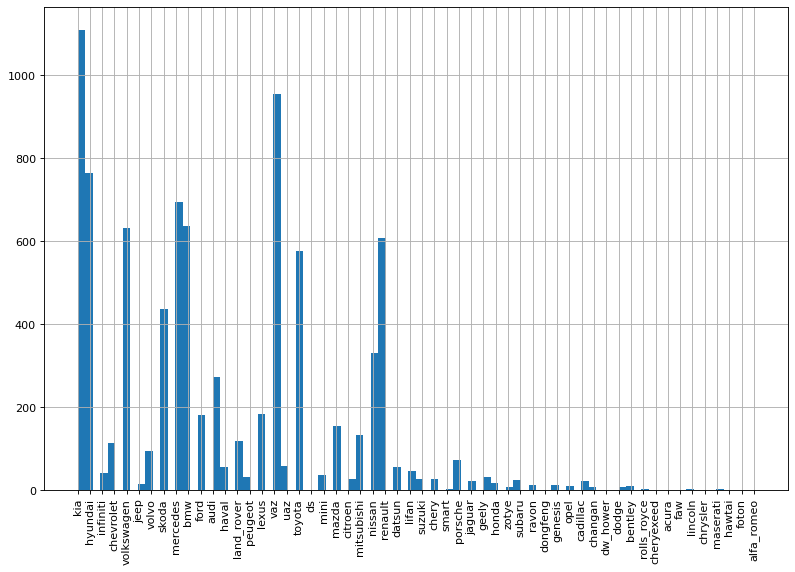

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

data.brand.hist(bins = 90,xrot = 90)

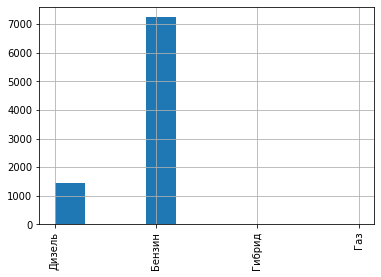

In [ ]:
data.flue_type.hist(xrot=90)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8716 entries, 0 to 1789
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            8716 non-null   object
 1   brand          8716 non-null   object
 2   model          8716 non-null   object
 3   year           8716 non-null   int64 
 4   mileage        8716 non-null   int32 
 5   body_type      8716 non-null   object
 6   color          8716 non-null   object
 7   engine_volume  8716 non-null   object
 8   horsepower     8716 non-null   int32 
 9   flue_type      8716 non-null   object
 10  tax            8716 non-null   object
 11  transmission   8716 non-null   object
 12  drive          8716 non-null   object
 13  whell          8716 non-null   object
 14  state          8716 non-null   object
 15  owners         8716 non-null   int64 
 16  pts            8716 non-null   object
 17  customs        8716 non-null   object
 18  price          8716 non-null

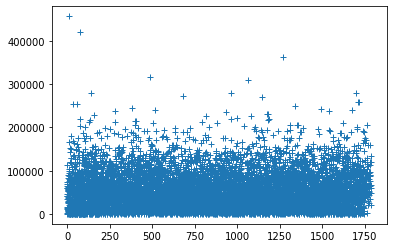

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data.mileage,'+')

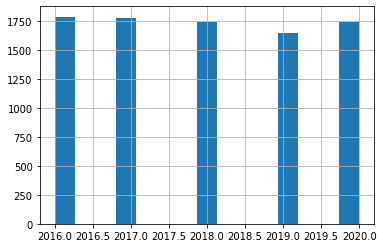

In [ ]:
data.year.hist(bins =15)

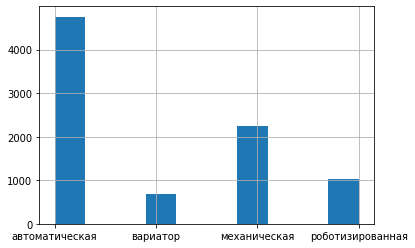

In [ ]:
data.transmission.sort_values().hist()

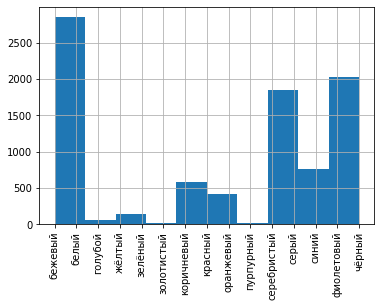

In [ ]:
data.color.sort_values().hist(xrot=90)

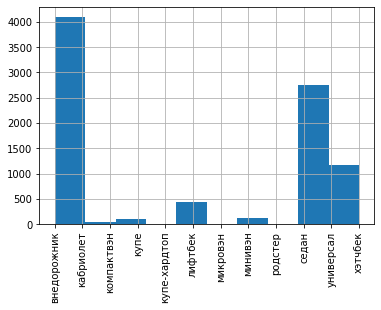

In [ ]:
data.body_type.sort_values().hist(xrot=90)

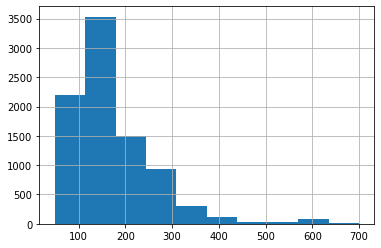

In [ ]:
data.horsepower.sort_values().hist()

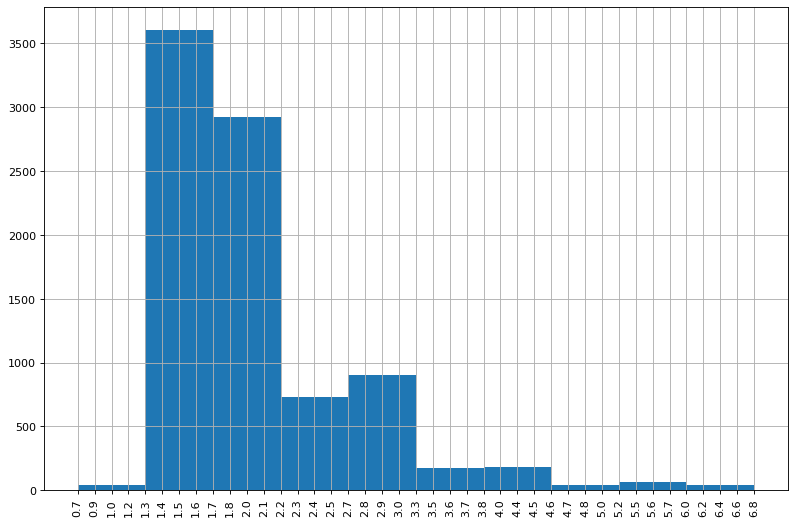

In [ ]:
figure(figsize=(12, 8), dpi=80)
data.engine_volume.sort_values().hist(xrot=90)